In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import statsmodels.api as sm
sns.set(rc={'figure.figsize':(6,6)})

In [2]:
data=pd.read_csv('in-vehicle-coupon-recommendation.csv')

In [3]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [4]:
data.shape

(12684, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
data.isnull().sum().sort_values(ascending=False) * 100 /len(data)

car                     99.148534
CoffeeHouse              1.710817
Restaurant20To50         1.490066
CarryAway                1.190476
RestaurantLessThan20     1.024913
Bar                      0.843582
destination              0.000000
passanger                0.000000
direction_opp            0.000000
direction_same           0.000000
toCoupon_GEQ25min        0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ5min         0.000000
income                   0.000000
occupation               0.000000
education                0.000000
has_children             0.000000
maritalStatus            0.000000
age                      0.000000
gender                   0.000000
expiration               0.000000
coupon                   0.000000
time                     0.000000
temperature              0.000000
weather                  0.000000
Y                        0.000000
dtype: float64

# AS THE CAR FEATURE IS 99.148534% EMPTY I AM DROPPING THIS FEATURE

In [7]:
data.drop(columns=['car'],axis=1,inplace=True)

In [8]:
data[['CoffeeHouse','Restaurant20To50','CarryAway','RestaurantLessThan20','Bar']].isnull().sum().sort_values(ascending=False) * 100 /len(data)

CoffeeHouse             1.710817
Restaurant20To50        1.490066
CarryAway               1.190476
RestaurantLessThan20    1.024913
Bar                     0.843582
dtype: float64

# AS THE TOTAL EMPTY ROWS CONSTITUTE ONLY 5% OF THE DATA,WE CAN DROP THOSE ROWS ,AS WE KNOW IT WILL NOT AFFECT THE ANALYSIS.

In [9]:
print("Shape of train data Before dropping any Row: ",data.shape)
data = data[data['Bar'].notna()]
print("Shape of train data After dropping Rows with NULL values: ",data.shape)
data = data[data['CoffeeHouse'].notna()]
print("Shape of train data After dropping Rows with NULL values: ",data.shape)
data = data[data['CarryAway'].notna()]
print("Shape of train data After dropping Rows with NULL values: ",data.shape)
data = data[data['RestaurantLessThan20'].notna()]
print("Shape of train data After dropping Rows with NULL values: ",data.shape)
data = data[data['Restaurant20To50'].notna()]
print("Shape of train data After dropping Rows with NULL values: ",data.shape)

Shape of train data Before dropping any Row:  (12684, 25)
Shape of train data After dropping Rows with NULL values:  (12577, 25)
Shape of train data After dropping Rows with NULL values:  (12402, 25)
Shape of train data After dropping Rows with NULL values:  (12293, 25)
Shape of train data After dropping Rows with NULL values:  (12205, 25)
Shape of train data After dropping Rows with NULL values:  (12079, 25)


In [10]:
data = data.reset_index(drop=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null

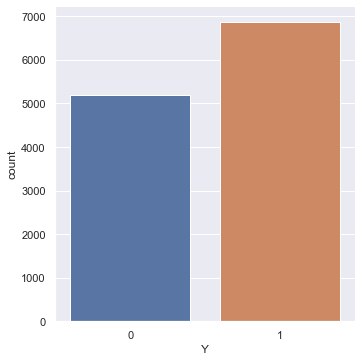

In [12]:
sns.catplot(x='Y',data=data,kind='count')
plt.show()

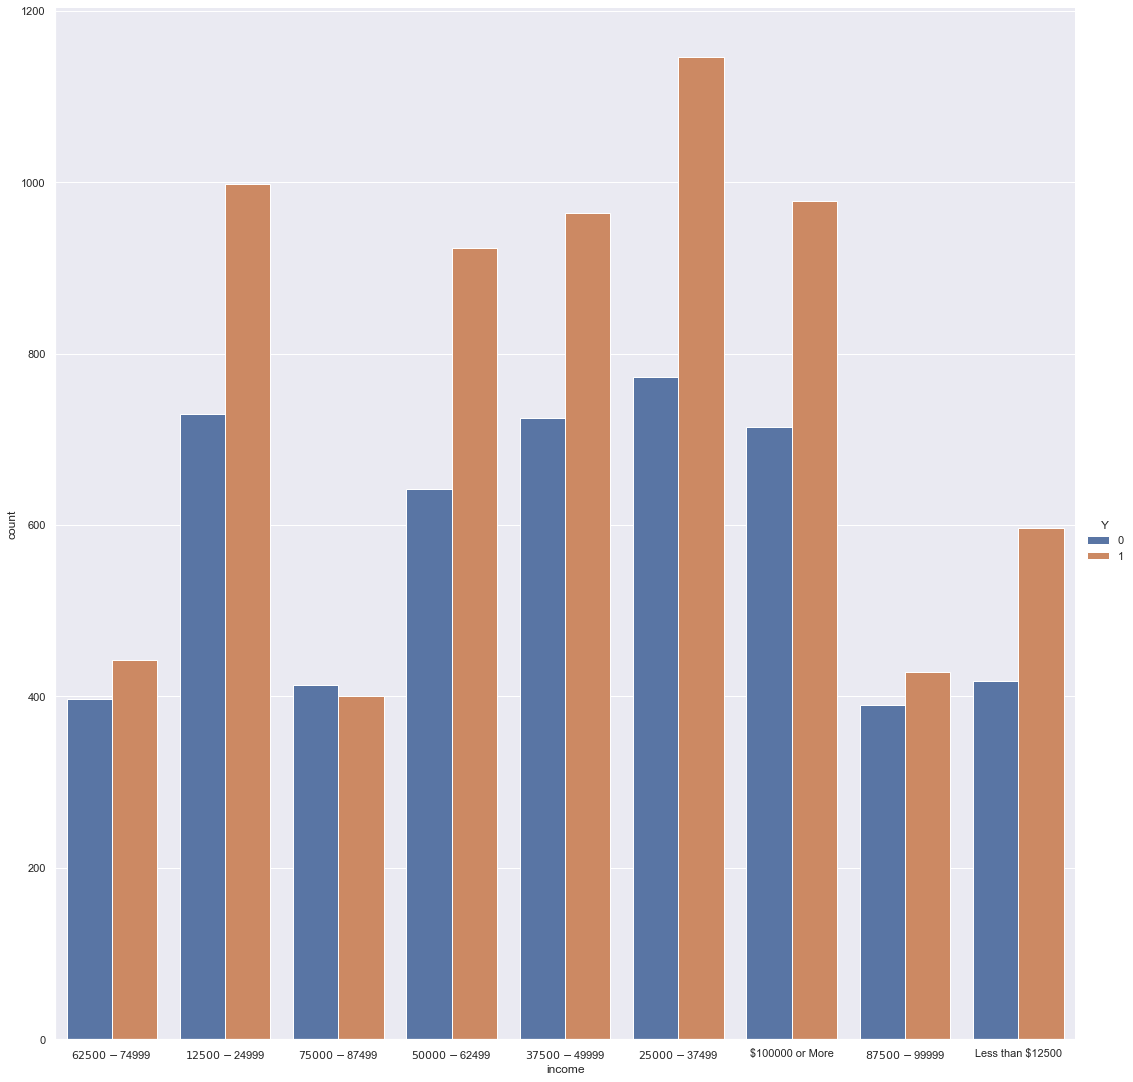

In [13]:
sns.catplot(x='income',data=data,hue='Y',kind='count',height=15)
plt.show()

# Inference1:The rows with higher income and lowest income  have relatively high acceptance rates when compared to the rows with avg salaries.

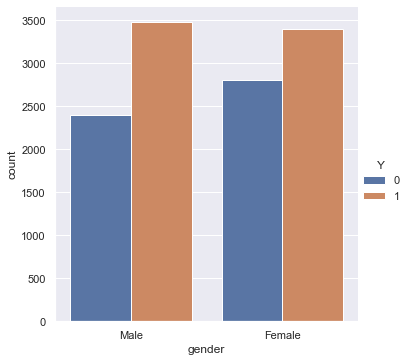

In [14]:
sns.catplot(x='gender',data=data,hue='Y',kind='count')
plt.show()

# Inference2:Gender feature has not much impact on acceptance rate of coupon as we can see in the plot

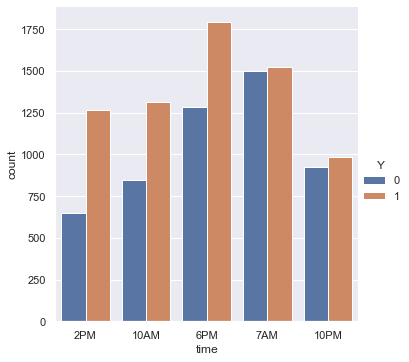

In [15]:
sns.catplot(x='time',data=data,hue='Y',kind='count')
plt.show()

# Inference3:At 2pm,10am,6pm the acceptance rates are high compared to rejection rates,where as at 7am and 10pm they are almost equal.

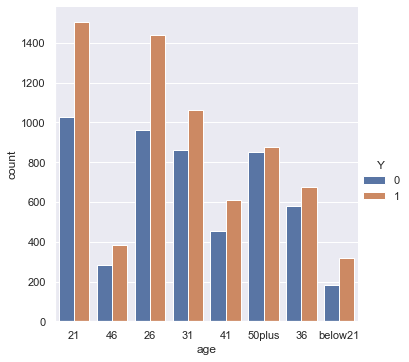

In [16]:
sns.catplot(x='age',data=data,hue='Y',kind='count')
plt.show()

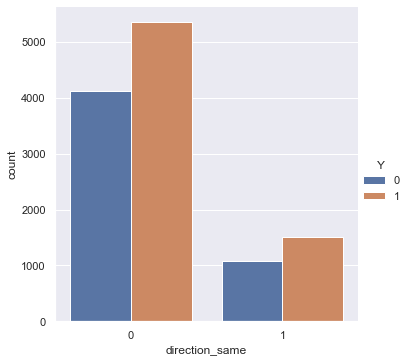

In [17]:
sns.catplot(x='direction_same',data=data,hue='Y',kind='count')
plt.show()

# if the direction is same the acceptance rates are high

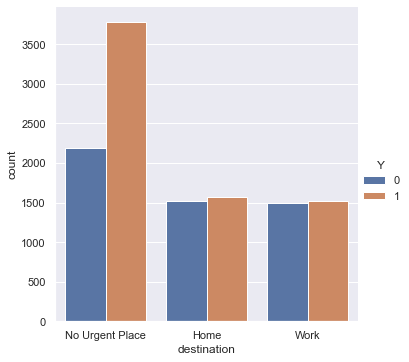

In [18]:
sns.catplot(x='destination',data=data,hue='Y',kind='count')
plt.show()

# when the destination is no urgent place the acceptance rates are high

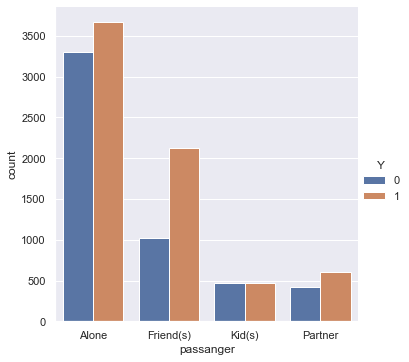

In [19]:
sns.catplot(x='passanger',data=data,hue='Y',kind='count')
plt.show() 

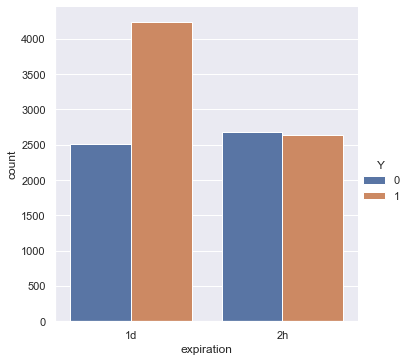

In [20]:
sns.catplot(x='expiration',data=data,hue='Y',kind='count')
plt.show() 

# when the expiration of the coupon offered is 1d the acceptance rates are high

In [21]:
def visual(s):
    sns.countplot(data[s])

C:\Users\vigne\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


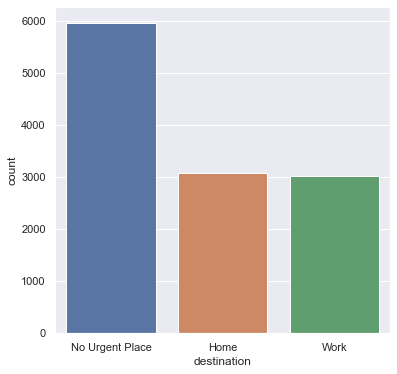

In [22]:
visual('destination')

C:\Users\vigne\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


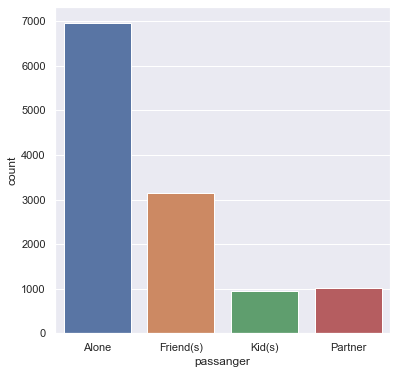

In [23]:
visual('passanger')

C:\Users\vigne\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


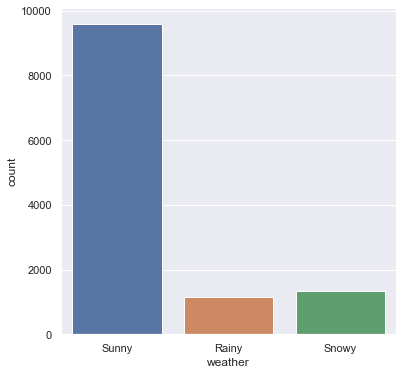

In [24]:
visual('weather')

C:\Users\vigne\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


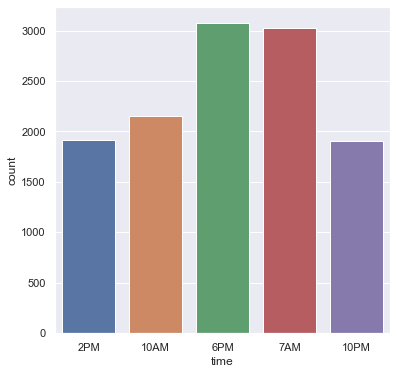

In [25]:
visual('time')

C:\Users\vigne\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


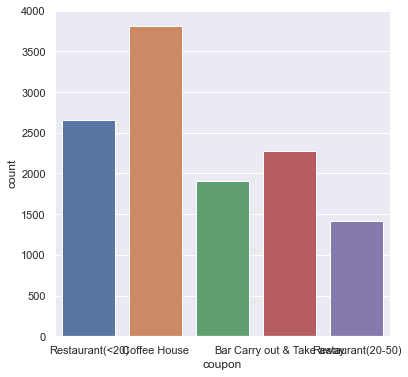

In [26]:
visual('coupon')

C:\Users\vigne\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


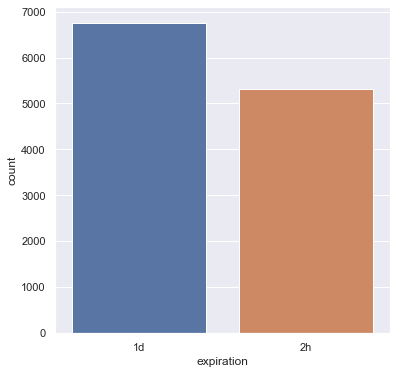

In [27]:
visual('expiration')

C:\Users\vigne\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


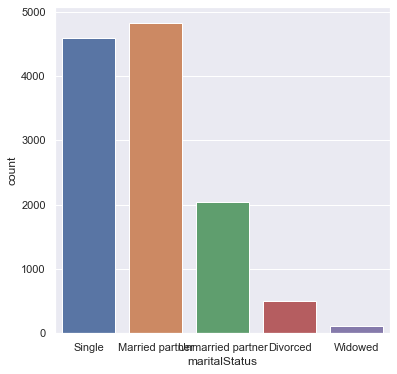

In [28]:
visual('maritalStatus')

C:\Users\vigne\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


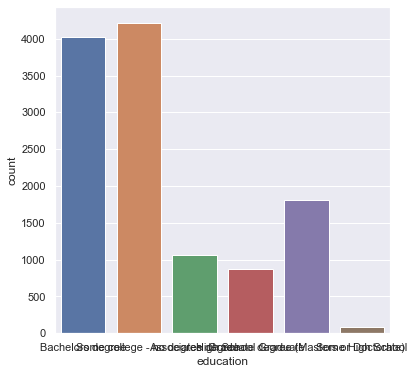

In [29]:
visual('education')

C:\Users\vigne\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


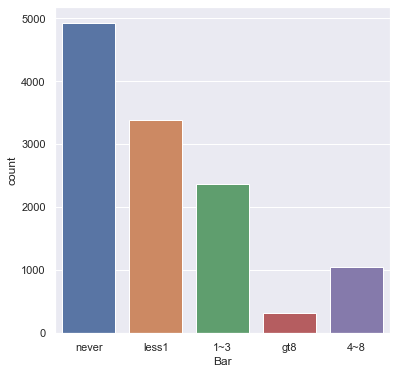

In [30]:
visual('Bar')

C:\Users\vigne\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


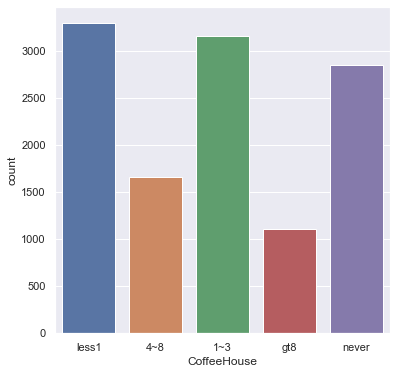

In [31]:
visual('CoffeeHouse')

C:\Users\vigne\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


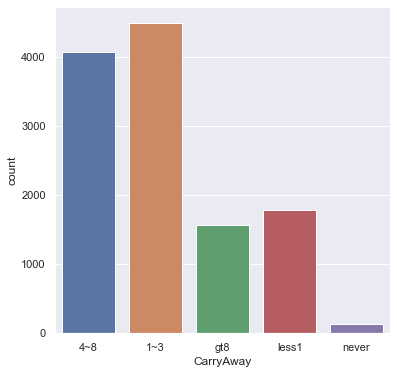

In [32]:
visual('CarryAway')

C:\Users\vigne\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


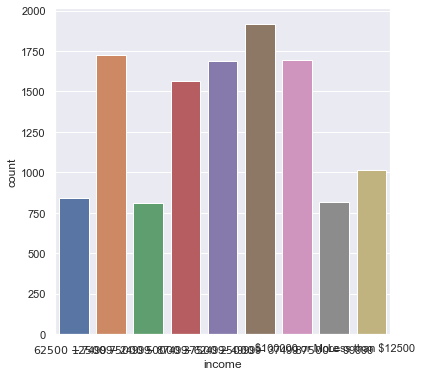

In [33]:
visual('income')

C:\Users\vigne\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


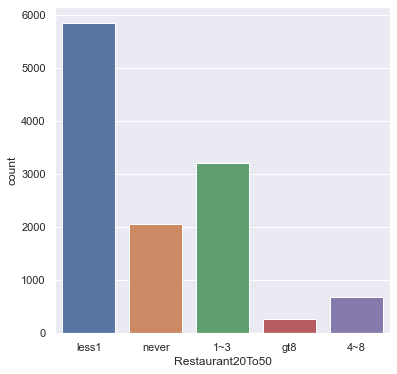

In [34]:
visual('Restaurant20To50')

C:\Users\vigne\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


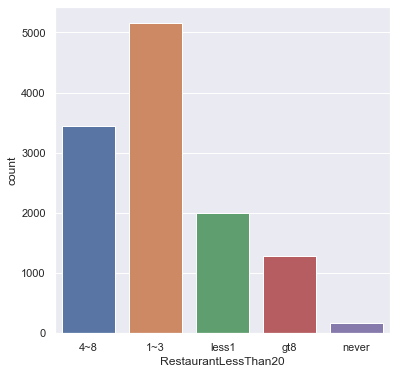

In [35]:
visual('RestaurantLessThan20')

# with respect our data all the features are categorical in nature so we are using lableEncoder to deal with the data which increases the no of features to great extent which not good for ml algorithms

In [36]:
df=data

In [37]:
number = LabelEncoder()
df['destination'] = number.fit_transform(df['destination'])
df['passanger'] = number.fit_transform(df['passanger'])
df['weather'] = number.fit_transform(df['weather'])
df['time'] = number.fit_transform(df['time'])
df['coupon'] = number.fit_transform(df['coupon'])
df['expiration'] = number.fit_transform(df['expiration'])
df['gender'] = number.fit_transform(df['gender'])
df['maritalStatus'] = number.fit_transform(df['maritalStatus'])
df['education'] = number.fit_transform(df['education'])
df['occupation'] = number.fit_transform(df['occupation'])
df['Bar'] = number.fit_transform(df['Bar'])
df['CoffeeHouse'] = number.fit_transform(df['CoffeeHouse'])
df['CarryAway'] = number.fit_transform(df['CarryAway'])
df['income'] = number.fit_transform(df['income'])
df['age']=number.fit_transform(df['age'])
df['Restaurant20To50'] = number.fit_transform(df['Restaurant20To50'])
df['RestaurantLessThan20'] = number.fit_transform(df['RestaurantLessThan20'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   destination           12079 non-null  int32
 1   passanger             12079 non-null  int32
 2   weather               12079 non-null  int32
 3   temperature           12079 non-null  int64
 4   time                  12079 non-null  int32
 5   coupon                12079 non-null  int32
 6   expiration            12079 non-null  int32
 7   gender                12079 non-null  int32
 8   age                   12079 non-null  int32
 9   maritalStatus         12079 non-null  int32
 10  has_children          12079 non-null  int64
 11  education             12079 non-null  int32
 12  occupation            12079 non-null  int32
 13  income                12079 non-null  int32
 14  Bar                   12079 non-null  int32
 15  CoffeeHouse           12079 non-null  int32
 16  Carr

In [39]:
X = df.drop(['Y'],axis=1)
y = df['Y']
X.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,1,0,2,55,2,4,0,1,0,2,...,4,3,1,1,3,1,0,0,0,1
1,1,1,2,80,0,2,1,1,0,2,...,4,3,1,1,3,1,0,0,0,1
2,1,1,2,80,0,0,0,1,0,2,...,4,3,1,1,3,1,0,0,0,1
3,1,1,2,80,0,1,1,1,0,2,...,4,3,1,1,3,1,1,0,0,1
4,1,1,2,80,2,2,0,1,0,2,...,4,3,1,1,3,1,0,0,0,1


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)

In [41]:
data['age'].unique()

array([0, 5, 1, 2, 4, 6, 3, 7])

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [43]:
X_train.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,0.009051,1.411398,0.472285,-0.442120,-0.151913,1.428696,-0.892762,-0.972351,0.626244,-0.849800,...,0.886295,0.587034,-0.066055,-0.912704,0.510593,0.0,0.882328,-0.362082,-0.515847,0.515847
1,-1.408156,-0.720322,0.472285,0.870885,0.541621,1.428696,-0.892762,-0.972351,1.523684,0.357367,...,0.886295,1.237797,1.780208,2.565340,1.181050,0.0,-1.133366,-0.362082,1.938561,-1.938561
2,-1.408156,-0.720322,0.472285,0.870885,0.541621,-0.049024,-0.892762,1.028435,-0.719916,0.357367,...,-1.042566,-0.063729,0.857077,-0.043193,0.510593,0.0,-1.133366,-0.362082,-0.515847,0.515847
3,0.009051,-0.720322,0.472285,0.870885,-1.538982,-1.526745,-0.892762,-0.972351,-0.719916,0.357367,...,0.886295,0.587034,-0.989186,-0.043193,1.181050,0.0,-1.133366,-0.362082,-0.515847,0.515847
4,1.426259,-0.720322,-2.708255,-0.442120,1.235155,-0.787884,-0.892762,1.028435,-0.271196,-0.849800,...,-1.685519,-1.365256,-0.066055,-0.043193,-0.830319,0.0,-1.133366,-0.362082,-0.515847,0.515847


In [44]:
x= sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     50.18
Date:                Tue, 16 Nov 2021   Prob (F-statistic):          1.27e-209
Time:                        15:03:20   Log-Likelihood:                -8120.4
No. Observations:               12079   AIC:                         1.629e+04
Df Residuals:                   12056   BIC:                         1.646e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
destination              0.0330      0.007      4.754      0.000       0.019       0.047
passanger                0.0208      0.005      4.018      0.000       0.011       0.031
weather                  0.0522      0.008      6.741      0.000       0.037       0.067
temperature              0.0003      0.000      1.182      0.237      -0.000       0.001
time                    -0.0253      0.004     -6.343      0.000      -0.033      -0.017
coupon                   0.0397      0.003     11.735      0.000       0.033       0.046
expiration              -0.1624      0.009    -18.084      0.000      -0.180      -0.145
gender                   0.0435      0.009      4.896      0.000       0.026       0.061
age                     -0.0031      0.002     -1.502      0.133      -0.007       0.001
maritalStatus            0.0022      0.006      0.372      0.710      -0.009       0.014
has_children            -0.0215      0.010     -2.066      0.039      -0.042      -0.001
education                0.0103      0.002      4.398      0.000       0.006       0.015
occupation               0.0006      0.001      1.144      0.253      -0.000       0.002
income                  -0.0067      0.002     -3.734      0.000      -0.010      -0.003
Bar                     -0.0132      0.003     -4.408      0.000      -0.019      -0.007
CoffeeHouse             -0.0454      0.003    -15.646      0.000      -0.051      -0.040
CarryAway               -0.0071      0.004     -1.767      0.077      -0.015       0.001
RestaurantLessThan20     0.0098      0.004      2.553      0.011       0.002       0.017
Restaurant20To50        -0.0112      0.003     -3.732      0.000      -0.017      -0.005
toCoupon_GEQ5min         0.4201      0.019     21.671      0.000       0.382       0.458
toCoupon_GEQ15min       -0.0271      0.010     -2.775      0.006      -0.046      -0.008
toCoupon_GEQ25min       -0.0579      0.016     -3.664      0.000      -0.089      -0.027
direction_same           0.2400      0.012     19.752      0.000       0.216       0.264
direction_opp            0.1801      0.011     16.297      0.000       0.158       0.202
==============================================================================
Omnibus:                    59346.175   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1415.335
Skew:                          -0.241   Prob(JB):                    4.61e-308
Kurtosis:                       1.394   Cond. No.                     1.43e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.72e-27. This might indicate that there are
strong multicollinearity probl

#  inference : from the above summary the r -square and adj r-squre are very low so we can't apply linear regression model

In [45]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
score_LR = LR.score(X_test,y_test)
print(classification_report(y_test, y_pred))
print('The accuracy of the Logistic Regression model is', score_LR)

              precision    recall  f1-score   support

           0       0.60      0.46      0.52      1545
           1       0.66      0.77      0.71      2079

    accuracy                           0.64      3624
   macro avg       0.63      0.61      0.61      3624
weighted avg       0.63      0.64      0.63      3624

The accuracy of the Logistic Regression model is 0.6371412803532008


In [46]:
# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
score_svc = svc.score(X_test,y_test)
print(classification_report(y_test, y_pred))
print('The accuracy of SVC model is', score_svc)

              precision    recall  f1-score   support

           0       0.64      0.54      0.59      1545
           1       0.69      0.77      0.73      2079

    accuracy                           0.67      3624
   macro avg       0.67      0.66      0.66      3624
weighted avg       0.67      0.67      0.67      3624

The accuracy of SVC model is 0.6746688741721855


In [47]:
# Decision Tree
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)
score_DT = DT.score(X_test,y_test)
print(classification_report(y_test, y_pred))
print("The accuracy of the Decision tree model is ",score_DT)

              precision    recall  f1-score   support

           0       0.62      0.65      0.63      1545
           1       0.73      0.70      0.71      2079

    accuracy                           0.68      3624
   macro avg       0.67      0.68      0.67      3624
weighted avg       0.68      0.68      0.68      3624

The accuracy of the Decision tree model is  0.6793598233995585


In [48]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print(classification_report(y_test, y_pred))
print('The accuracy of the KNN Model is',score_knn)

              precision    recall  f1-score   support

           0       0.59      0.55      0.57      1545
           1       0.68      0.71      0.70      2079

    accuracy                           0.64      3624
   macro avg       0.63      0.63      0.63      3624
weighted avg       0.64      0.64      0.64      3624

The accuracy of the KNN Model is 0.6421081677704195


In [49]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy=model.score(X_test,y_test)
print(classification_report(y_test, y_pred))
print('The accuracy of the Naive Bayes Model is',accuracy)

              precision    recall  f1-score   support

           0       0.56      0.40      0.47      1545
           1       0.63      0.77      0.69      2079

    accuracy                           0.61      3624
   macro avg       0.60      0.58      0.58      3624
weighted avg       0.60      0.61      0.60      3624

The accuracy of the Naive Bayes Model is 0.6106512141280354
